In [161]:
# https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/discussion/420633

In [162]:
import pandas as pd
import seaborn as sns

In [163]:
# Let's look at the data
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')
df.head()

C:\Users\pedre\AppData\Local\Temp\ipykernel_16644\2079840566.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [164]:
# Let's make all columns labels lower case
df.columns = df.columns.str.lower()
df.head()

,year of event,event dates,event name,event distance/length,event number of finishers,athlete performance,athlete club,athlete country,athlete year of birth,athlete gender,athlete age category,athlete average speed,athlete id
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [165]:
# Only ITA races, 50k km, year 2020
df2 = df[(df['event distance/length'] == '50km') & (df['year of event'] == 2020) & (df['event name'].str.contains('ITA'))]
df2.head()

,year of event,event dates,event name,event distance/length,event number of finishers,athlete performance,athlete club,athlete country,athlete year of birth,athlete gender,athlete age category,athlete average speed,athlete id
2613471,2020,23.02.2020,Terre di Siena Ultramarathon (ITA),50km,462,3:23:24 h,POD. Ozzanese,ITA,1981.0,M,M35,14.749,36487
2613472,2020,23.02.2020,Terre di Siena Ultramarathon (ITA),50km,462,3:35:03 h,POL. Dil. Santa Lucia,ITA,1981.0,M,M35,13.95,89785
2613473,2020,23.02.2020,Terre di Siena Ultramarathon (ITA),50km,462,3:47:58 h,A.S.D. Risubbiani 2008,ITA,1978.0,M,M40,13.16,3564
2613474,2020,23.02.2020,Terre di Siena Ultramarathon (ITA),50km,462,3:53:58 h,Marathon Cremona,ITA,1989.0,M,M23,12.822,36509
2613475,2020,23.02.2020,Terre di Siena Ultramarathon (ITA),50km,462,3:55:08 h,Sevenlife SSD,ITA,1974.0,M,M45,12.759,826011


In [166]:
# Let's do a quick check regarding my filtering
print(df2['event distance/length'].unique())
print(df2['year of event'].unique())
print(df2['event name'].unique())

['50km']
[2020]
['Terre di Siena Ultramarathon (ITA)' 'Bettona Crossing (ITA)'
 '6 Days UMF - 50 K (ITA)' 'Pantelleria Trail (ITA)'
 'Ultra Beach 50 Km (ITA)']


In [167]:
# Drop NA and duplicates
df2 = df2.dropna()
df2 = df2.drop_duplicates()

In [168]:
# Let's check data types since I've been given an error about it
print('shape:', df2.shape)
print(df2.dtypes)

shape: (584, 13)
year of event                  int64
event dates                   object
event name                    object
event distance/length         object
event number of finishers      int64
athlete performance           object
athlete club                  object
athlete country               object
athlete year of birth        float64
athlete gender                object
athlete age category          object
athlete average speed         object
athlete id                     int64
dtype: object


In [169]:
# Fixing data types
df2['athlete year of birth'] = df2['athlete year of birth'].astype(int)
df2['event dates'] = pd.to_datetime(df2['event dates'], dayfirst = True)
df2['athlete average speed'] = df2['athlete average speed'].astype(float)

df2['event distance/length'] = df2['event distance/length'].str.extract('(\d+)', expand = False)
df2['event distance/length'] = pd.to_numeric(df2['event distance/length'])

df2.dtypes

year of event                         int64
event dates                  datetime64[ns]
event name                           object
event distance/length                 int64
event number of finishers             int64
athlete performance                  object
athlete club                         object
athlete country                      object
athlete year of birth                 int32
athlete gender                       object
athlete age category                 object
athlete average speed               float64
athlete id                            int64
dtype: object

In [170]:
# Add the 'athlete age' comlumn. We don't have the exact birth date, so it will not be 100% accurate
df2['athlete age'] = 2020 - df2['athlete year of birth']
df2.head()

,year of event,event dates,event name,event distance/length,event number of finishers,athlete performance,athlete club,athlete country,athlete year of birth,athlete gender,athlete age category,athlete average speed,athlete id,athlete age
2613471,2020,2020-02-23,Terre di Siena Ultramarathon (ITA),50,462,3:23:24 h,POD. Ozzanese,ITA,1981,M,M35,14.749,36487,39
2613472,2020,2020-02-23,Terre di Siena Ultramarathon (ITA),50,462,3:35:03 h,POL. Dil. Santa Lucia,ITA,1981,M,M35,13.950,89785,39
2613473,2020,2020-02-23,Terre di Siena Ultramarathon (ITA),50,462,3:47:58 h,A.S.D. Risubbiani 2008,ITA,1978,M,M40,13.160,3564,42
2613474,2020,2020-02-23,Terre di Siena Ultramarathon (ITA),50,462,3:53:58 h,Marathon Cremona,ITA,1989,M,M23,12.822,36509,31
2613475,2020,2020-02-23,Terre di Siena Ultramarathon (ITA),50,462,3:55:08 h,Sevenlife SSD,ITA,1974,M,M45,12.759,826011,46


In [171]:
#Let's gather some statistical information about the dataset
df2.describe()

,year of event,event dates,event distance/length,event number of finishers,athlete year of birth,athlete average speed,athlete id,athlete age
count,584.0,584,584.0,584.000000,584.000000,584.000000,584.000000,584.000000
mean,2020.0,2020-04-23 20:35:20.547945216,50.0,369.551370,1971.849315,8.686914,369919.210616,48.150685
min,2020.0,2020-02-23 00:00:00,50.0,5.000000,1945.000000,5.386000,2311.000000,22.000000
25%,2020.0,2020-02-23 00:00:00,50.0,147.000000,1966.000000,7.602000,36886.000000,42.000000
50%,2020.0,2020-02-23 00:00:00,50.0,462.000000,1972.000000,8.637500,217128.500000,48.000000
75%,2020.0,2020-09-26 00:00:00,50.0,462.000000,1978.000000,9.679500,742545.000000,54.000000
max,2020.0,2020-10-17 00:00:00,50.0,462.000000,1998.000000,14.749000,838692.000000,75.000000
std,0.0,NaN,0.0,149.722548,9.016160,1.555555,338522.316748,9.016160


D:\Programmi\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


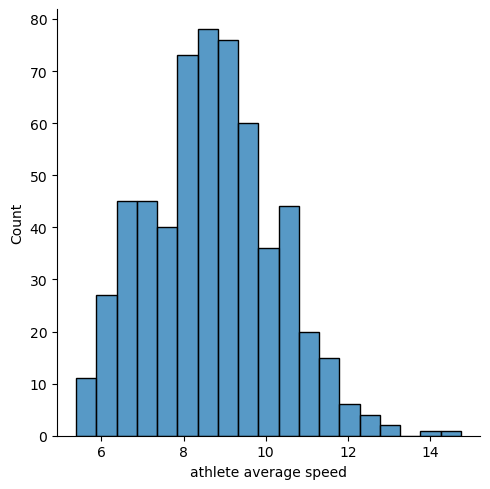

In [181]:
# Let's visualize the athlete average speed distribution
sns.displot(df2[df2['event distance/length'] == 50]['athlete average speed'])

<Axes: xlabel='event distance/length', ylabel='athlete average speed'>

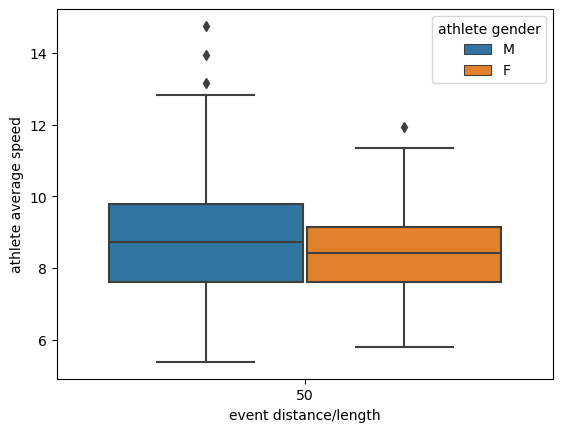

In [186]:
# What about differences by athlete gender?
sns.boxplot(data = df2, x = 'event distance/length', y = 'athlete average speed', hue = 'athlete gender')

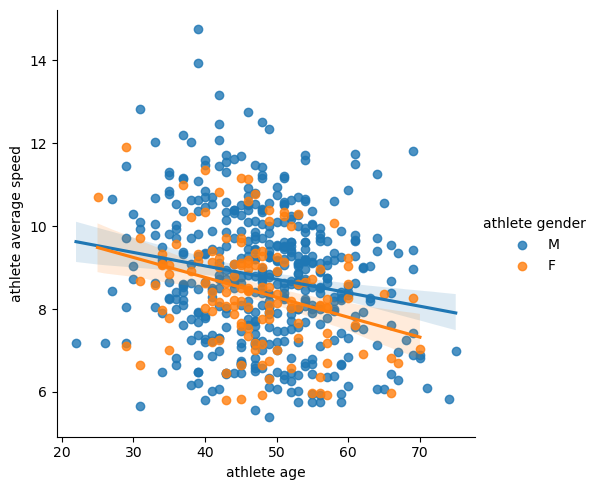

In [187]:
#What about differences by athlete gender and age?
sns.lmplot(data = df2, x = 'athlete age', y = 'athlete average speed', hue = 'athlete gender')

In [ ]:
# Qestions about dataset

In [188]:
# 1. Is there any difference in speed between males and females?
df2.groupby(['event distance/length','athlete gender'])['athlete average speed'].mean()

event distance/length  athlete gender
50                     F                 8.421859
                       M                 8.766608
Name: athlete average speed, dtype: float64

In [216]:
# 2. What age groups are the best?
average_speed_by_age = df2.groupby('athlete age')['athlete average speed'].agg(['mean', 'count']).sort_values('mean', ascending = False)
average_speed_by_age.head()

,mean,count
athlete age,,
25,10.710000,1
33,9.685286,7
27,9.541500,2
37,9.471929,14
30,9.354000,3


D:\Programmi\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programmi\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0, 0.5, 'average speed')]

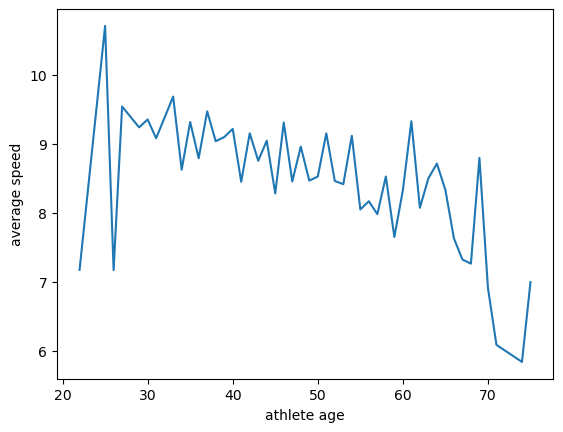

In [210]:
sns.lineplot(data = average_speed_by_age,  x = 'athlete age', y = 'mean',).set(ylabel = 'average speed')

In [218]:
# 3. What age groups are the worst?
average_speed_by_age_reverse = df2.groupby('athlete age')['athlete average speed'].agg(['mean', 'count']).sort_values('mean', ascending = True)
average_speed_by_age_reverse.head()

,mean,count
athlete age,,
74,5.839,1
71,6.086,1
70,6.912,3
75,6.997,1
26,7.171,1


In [259]:
# 4. What italian event has the highest average athlete speed?
df2.groupby('event name')['athlete average speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
event name,,
Ultra Beach 50 Km (ITA),9.543833,12
Terre di Siena Ultramarathon (ITA),9.111012,420
Bettona Crossing (ITA),7.471150,147
Pantelleria Trail (ITA),6.749600,5
